# Regresión lineal simple

Una observación: esta guía fue hecha en Google Colab, que soporta LaTeX, no asi Jupyter Markdown en VS Code aparentemente, asi que puede haber problemas visualizandola si no es en Google Colab

In [3]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/77/91f92b2fddbd14201bf36cd0c0e7279f1501a88e7a00ef11261c4b95bb7a/scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/ae/e2/4dea6313ef2b38442fccbbaf4017e50a6c3c8a50e8ee9b512783e5c90409/joblib-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

## Ejercicio 1
a) Implementar una función que calcule la pendiente y la ordenada al origen de la recta de regresión lineal con las fórmulas vistas en clase

<h3>
$β_1=\frac{\sum_{i=0}^n (x_i - x)(y_i-\bar{y})}{\sum_{i=0}^n (x_i-\bar{x})^2}$
</h3>

<h3>
$\beta_0 = \bar{y} - \beta_1 \bar{x} $

donde

<h3>$\bar{x}=\frac{1}{n} \sum_{i=0}^n x_i$

<h3>$\bar{y}=\frac{1}{n} \sum_{i=0}^n y_i$

In [3]:
def coefs_r1(x,y):
  beta_1=np.sum((x-np.mean(x))*(y-np.mean(y))) / np.sum(x-np.mean(x))
  beta_0=np.mean(y)-beta_1*np.mean(x)
  return beta_1,beta_0

b) Probar la función con el dataset gapminder

In [4]:
pip install gapminder

In [5]:
from gapminder import gapminder

In [6]:
datos = gapminder[gapminder["country"]=="Argentina"]
print(coefs_r1(datos["year"],datos["lifeExp"]))

(inf, -inf)


<ipython-input-3-554bf207ff14>:2: RuntimeWarning: divide by zero encountered in scalar divide
  beta_1=np.sum((x-np.mean(x))*(y-np.mean(y))) / np.sum(x-np.mean(x))


In [7]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["year"]],datos[["lifeExp"]])
beta_1=modelo.coef_.item()
beta_0=modelo.intercept_.item()
print(beta_1,beta_0)

0.23170839160839155 -389.6063445221444


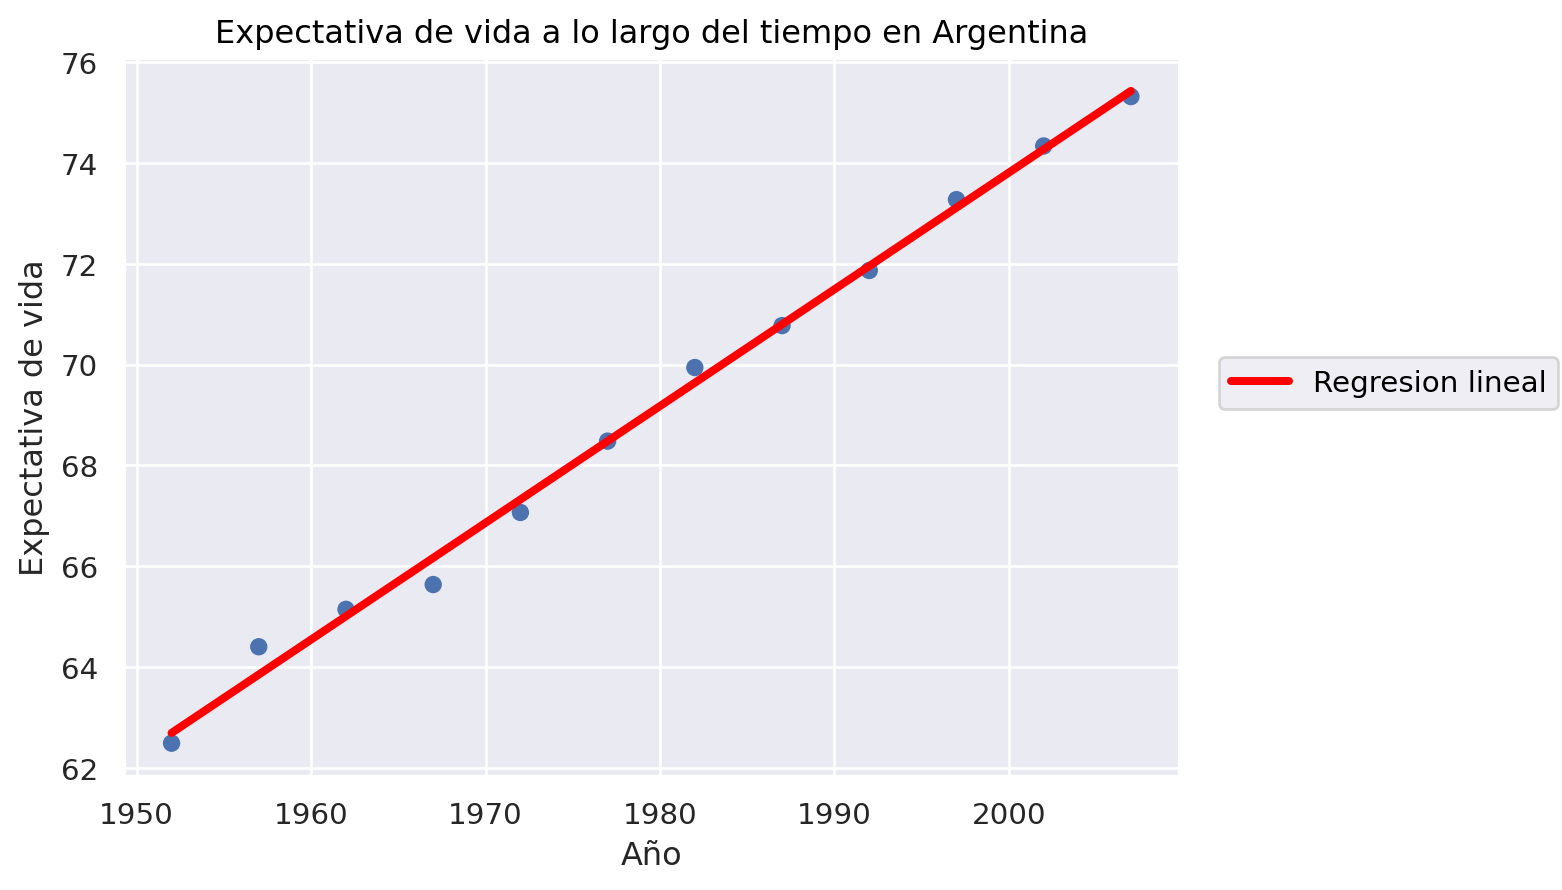

In [8]:
(
    so.Plot(data=datos, x='year', y='lifeExp')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Expectativa de vida a lo largo del tiempo en Argentina', x='Año', y='Expectativa de vida')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

In [9]:
y_pred = modelo.predict(datos[['year']])
r2_score(datos[['lifeExp']], y_pred)

0.9955680955772934

In [10]:
modelo.predict(pd.DataFrame({'year':[100,3000]})) #No funca en el año 100, y para el 3000 dudoso

array([[-366.43550536],
       [ 305.5188303 ]])

## Ejercicio 2


In [1]:
datos = pd.read_csv('../../datos/inmuebles.csv')
datos.head()

NameError: name 'pd' is not defined

a) Realizar un gráfico de dispersión que muestre la relación entre la superficie y el precio de cada inmueble

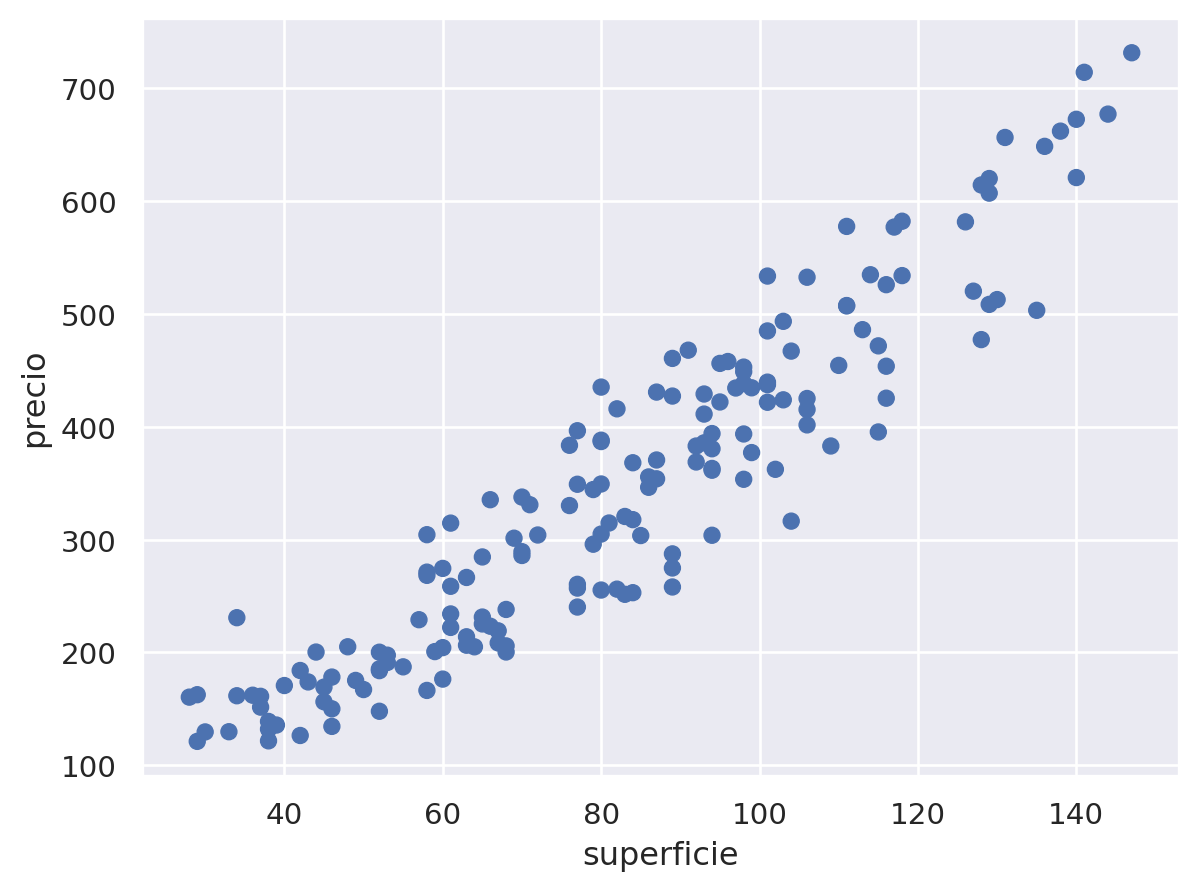

In [12]:
(
    so.Plot(data=datos,x="superficie",y="precio")
    .add(so.Dot())
)

b) Realizar un gráfico con la regresión lineal

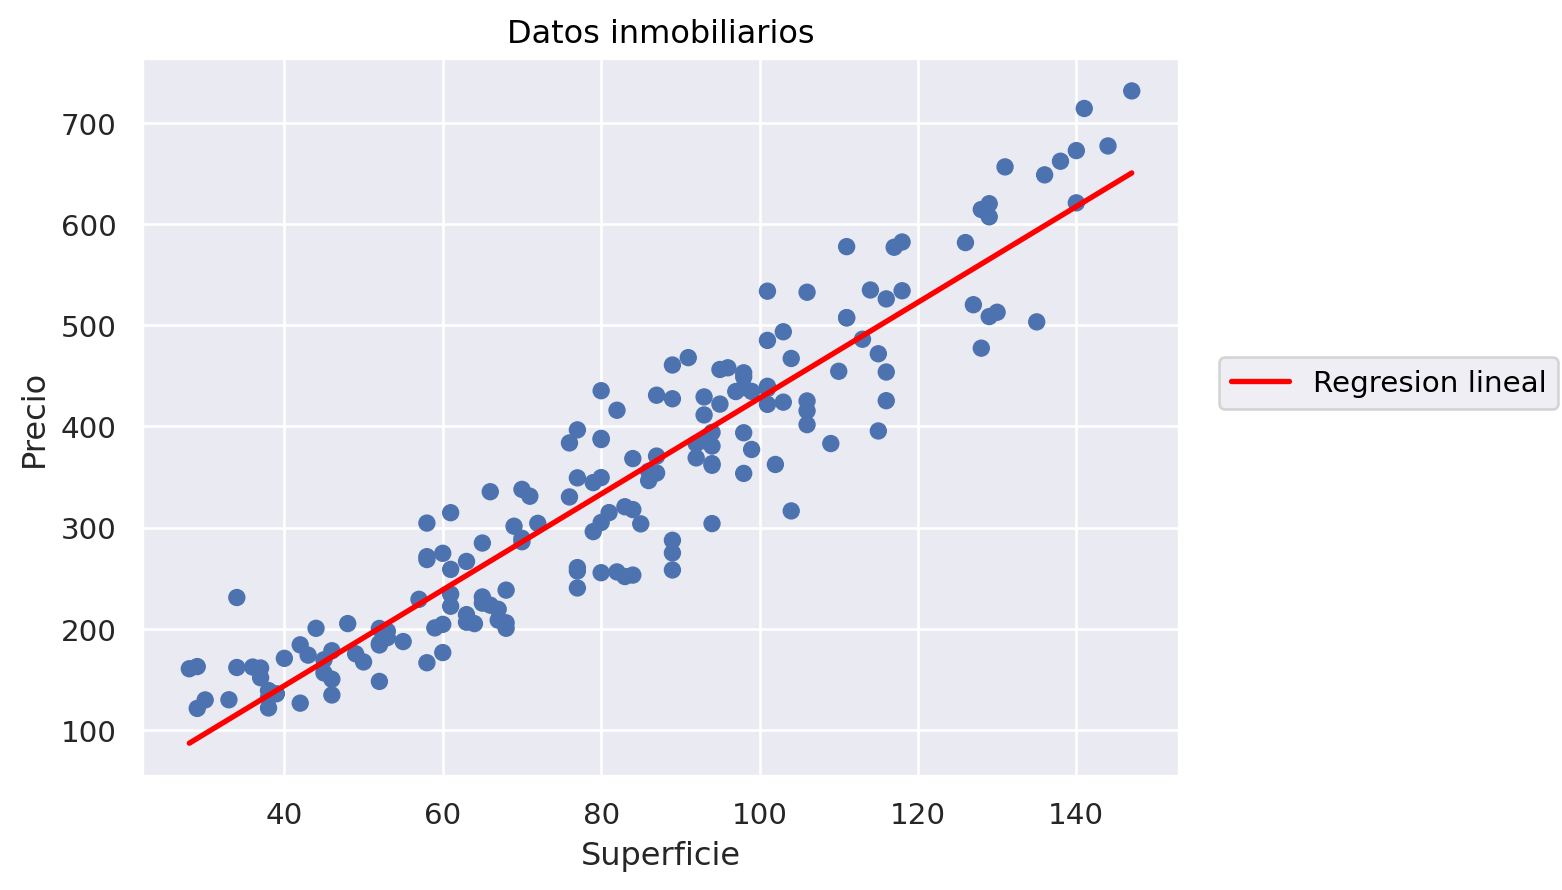

In [13]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos inmobiliarios', x='Superficie', y='Precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

c) Calcular los componentes

In [14]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["superficie"]],datos[["precio"]])
beta_1=modelo.coef_.item()
beta_0=modelo.intercept_.item()
print(beta_1,beta_0)

4.73579682230239 -45.73153403092567


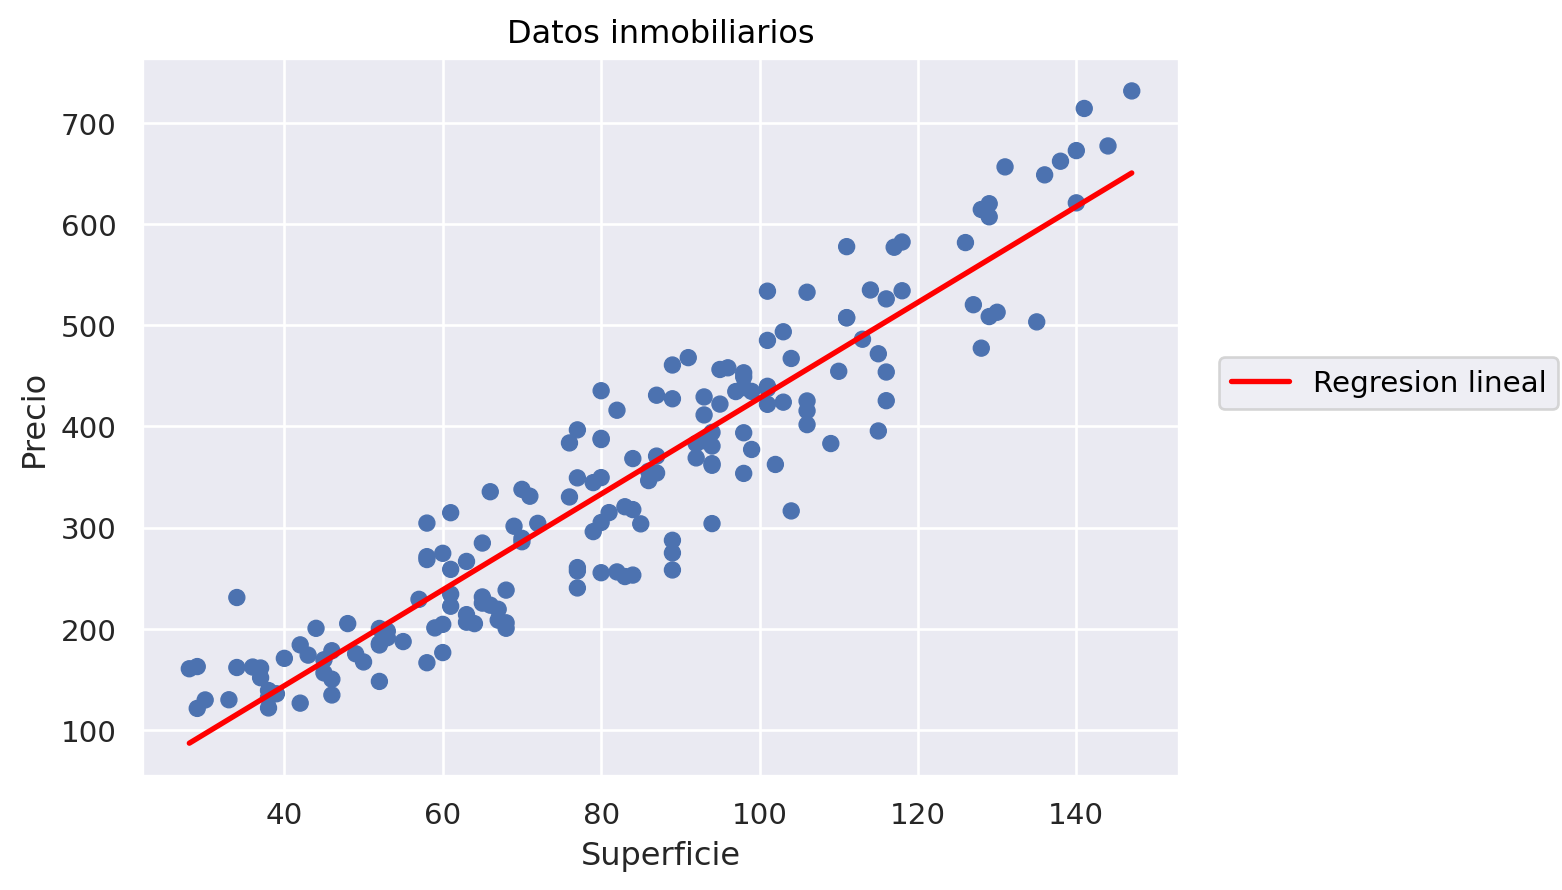

In [15]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2),y=beta_0+beta_1*datos["superficie"], label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos inmobiliarios', x='Superficie', y='Precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

Podemos deducir que el precio es proporcional al metro cuadrado, mediante el $\beta_1$, es decir, que mas o menos, cada vez que quiero aumentar de metro cuadrado necesito $\beta_1 ≈ 4.73$ dólares

d) Hagamos una funcion para medir Error Cuadratico Medio, y el R²

In [16]:
def ecm(x,y,pendiente,o_origen):
  return np.mean((y-(o_origen+pendiente*x))**2)

def r_cuad(x,y,pendiente,o_origen):
  return np.mean(((o_origen+pendiente*x)-np.mean(y))**2) / np.mean(((y-np.mean(y))**2))

e) Utilizando las funciones implementadas, calcular el ECM y el $R^2$ del ajuste realizado en el item (b) ¿En qué unidades está cada medida? ¿Cómo podemos interpretarlas?

In [17]:
ecm(datos["superficie"],datos["precio"],beta_1,beta_0)

2630.9300019446955

In [18]:
r_cuad(datos["superficie"],datos["precio"],beta_1,beta_0)

0.876211469835793

El error cuadrático medio, justamente está en unidades cuadradas, asi que estaría copado tomarle raíz cuadrada, para estimar una media de cuanto le estamos errando con el modelo

In [19]:
np.sqrt(ecm(datos["superficie"],datos["precio"],beta_1,beta_0))

51.292592076679995

El $R^2$ nos indica que nuestro modelo es dentro de todo bastante bueno, pues es una medida de 0 a 1 de la precisión, entonces un 0.88 es bastante bueno

f) Comparar los resultados obtenidos en el ítem anterior, con los proporcionados por $\texttt{r2_score}$ y $\texttt{mean_squared_error}$ de $\texttt{scikit_learn}$

In [20]:
datos["precio"]

0      454.425690
1      383.004114
2      437.362638
3      304.392486
4      620.027722
          ...    
164    525.953698
165    582.190837
166    200.256009
167    151.569142
168    361.533609
Name: precio, Length: 169, dtype: float64

In [21]:
precio_pred = modelo.predict(datos[['superficie']])
r2_score(datos['precio'], precio_pred)

0.8762114698357936

In [22]:
mean_squared_error(datos['precio'],precio_pred)

2630.9300019446955

Están bien nuestras funciones 😀

g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad de precios. ¿Hay algún outlier?

<Axes: xlabel='superficie', ylabel='precio'>

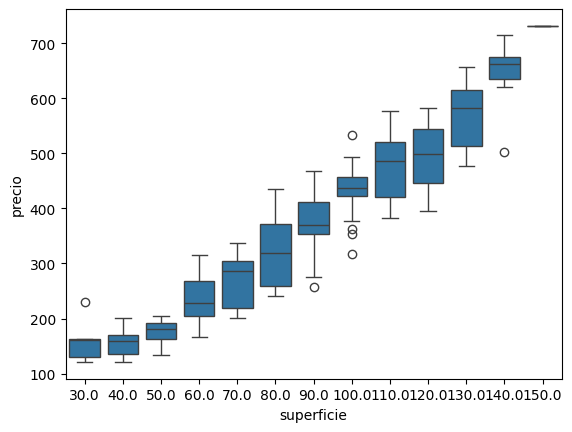

In [35]:
sns.boxplot(x=datos["superficie"].round(-1),y=datos["precio"])

El mejor intento de boxplot que pude hacer fue este, usando round(-1) para que me de intervalos de 10m$^2$. Lo que se puede observar es que hay varios outliers, y que zona de mayor variabilidad es alrededor de los 100 o 110 m$^2$

Ok, acabo de entender que habia que usar las zonas jaja

In [36]:
datos.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

<Axes: xlabel='zona', ylabel='precio'>

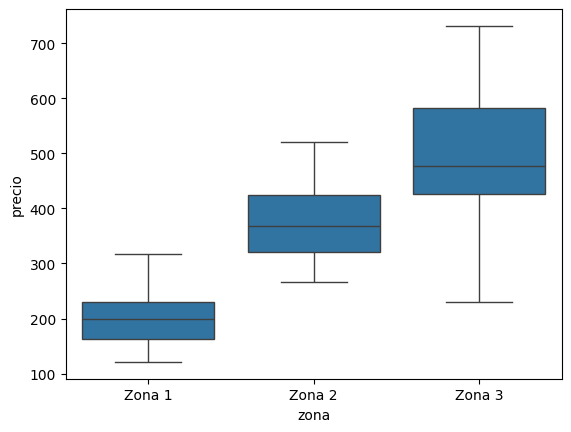

In [38]:
sns.boxplot(data=datos,x="zona",y="precio",order=sorted(datos["zona"].unique()))

Ahora sí, podemos ver que en la zona 3 es donde mas variabilidad de precios hay, y que no hay outliers respecto de las zonas

h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R^2 de la recta que mejor aproxima los datos

Primero obtenemos los datos de la Zona 1:

In [40]:
datos_zona1=datos[datos["zona"]=="Zona 1"]

In [44]:
modelo_zona1=linear_model.LinearRegression()
modelo_zona1.fit(datos_zona1[["superficie"]],datos_zona1[["precio"]])
beta_1_zona1=modelo_zona1.coef_.item()
beta_0_zona1=modelo_zona1.intercept_.item()
print(beta_1,beta_0)
precio_zona1_pred=modelo_zona1.predict(datos_zona1[["superficie"]])
print(r2_score(datos_zona1["precio"],precio_zona1_pred))
print(mean_squared_error(datos_zona1["precio"],precio_zona1_pred))

4.73579682230239 -45.73153403092567
0.855923919218176
331.22746770470974


Las otras 2 son análogas:

In [46]:
datos_zona2=datos[datos["zona"]=="Zona 2"]

In [47]:
modelo_zona2=linear_model.LinearRegression()
modelo_zona2.fit(datos_zona2[["superficie"]],datos_zona2[["precio"]])
beta_1_zona2=modelo_zona2.coef_.item()
beta_0_zona2=modelo_zona2.intercept_.item()
print(beta_1,beta_0)
precio_zona2_pred=modelo_zona2.predict(datos_zona2[["superficie"]])
print(r2_score(datos_zona2["precio"],precio_zona2_pred))
print(mean_squared_error(datos_zona2["precio"],precio_zona2_pred))

4.73579682230239 -45.73153403092567
0.866027281146202
611.4955812522104


In [48]:
datos_zona3=datos[datos["zona"]=="Zona 3"]

In [50]:
modelo_zona3=linear_model.LinearRegression()
modelo_zona3.fit(datos_zona3[["superficie"]],datos_zona3[["precio"]])
beta_1_zona3=modelo_zona3.coef_.item()
beta_0_zona3=modelo_zona3.intercept_.item()
print(beta_1,beta_0)
precio_zona3_pred=modelo_zona3.predict(datos_zona3[["superficie"]])
print(r2_score(datos_zona3["precio"],precio_zona3_pred))
print(mean_squared_error(datos_zona3["precio"],precio_zona3_pred))

4.73579682230239 -45.73153403092567
0.9445652745220188
748.8800907160429


Parece que son todas rectas bastante parecidas

i) Graficar los datos y el ajuste lineal de cada zona utilizando el método $\texttt{facet()}$ de $\texttt{Plot()}$ (recordar el ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona? ¿Qué podemos concluir si comparamos estos valores con lo obtenido en el item c)?

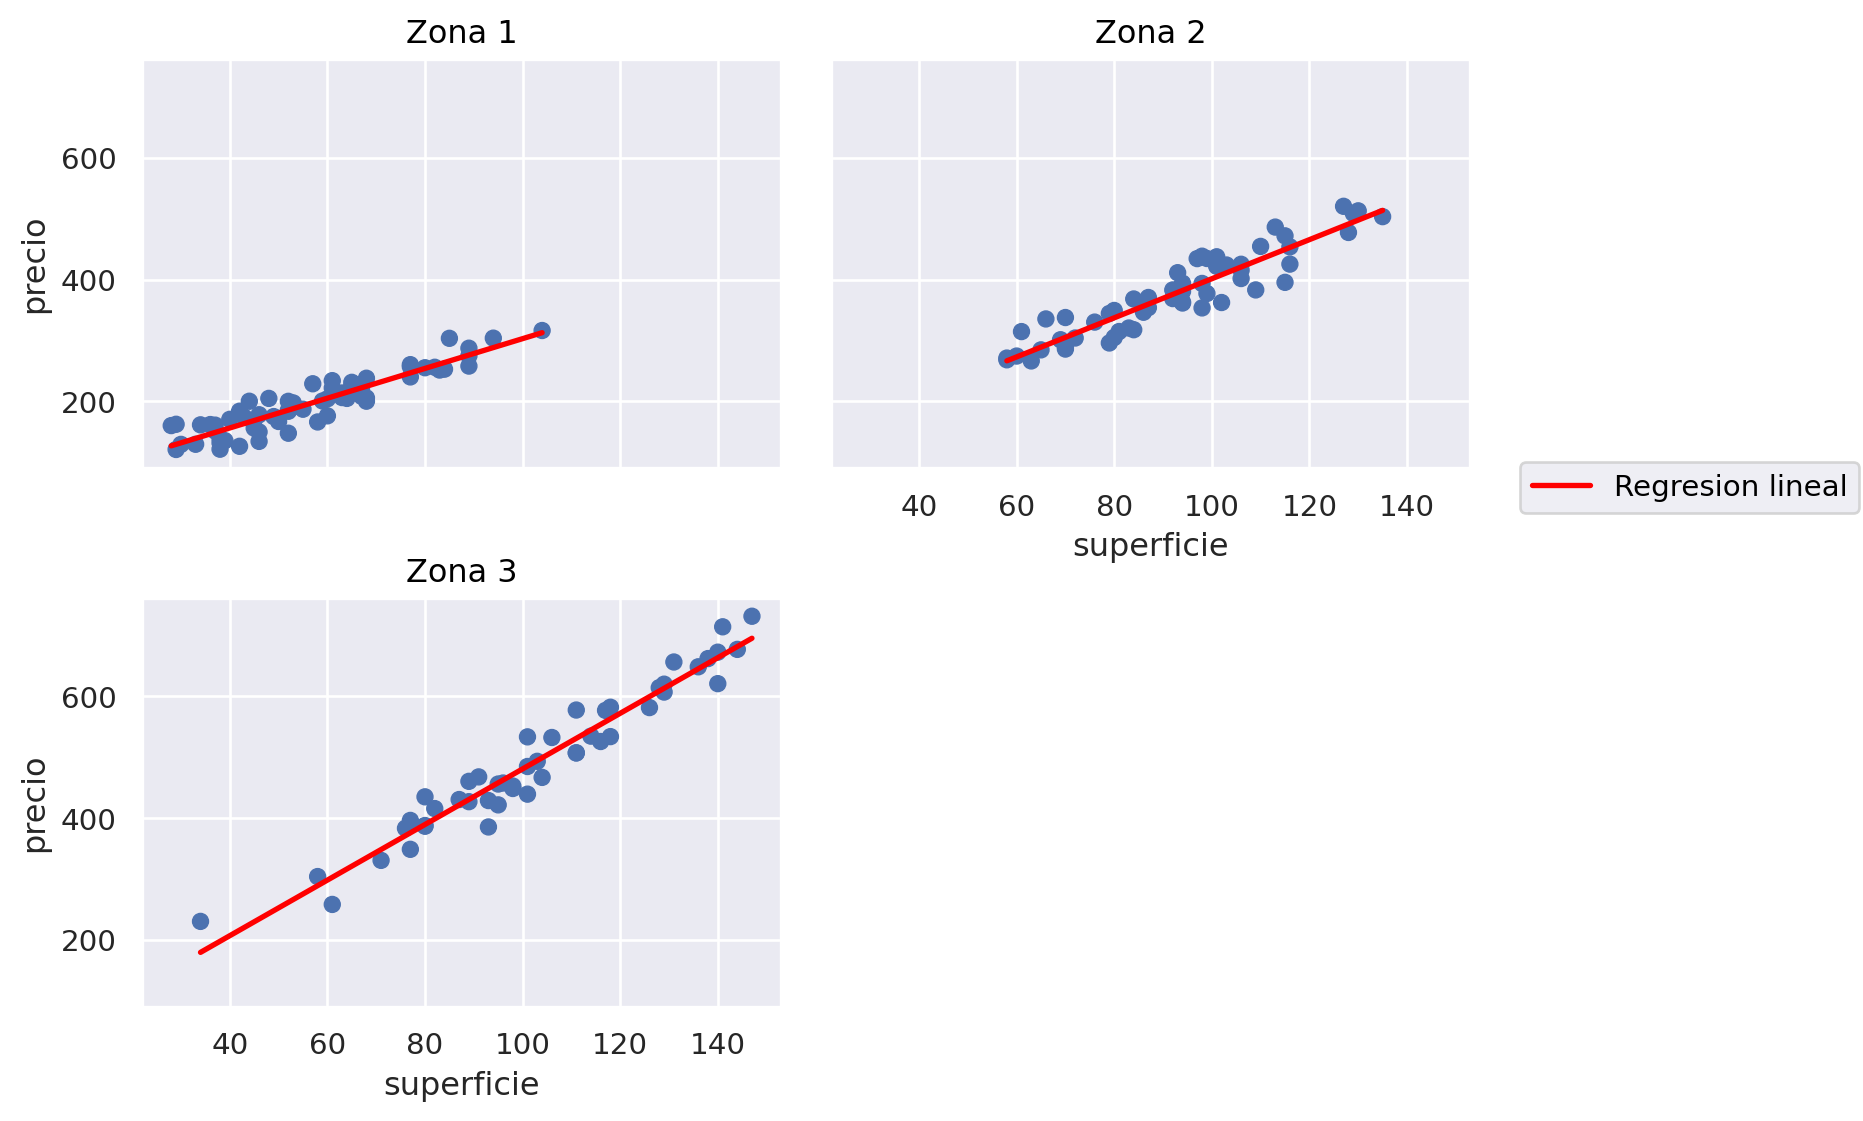

In [57]:
(
    so.Plot(datos,"superficie","precio")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1), label='Regresion lineal')
).facet("zona",wrap=2,order=sorted(datos["zona"].unique())).layout(size=(8,6))

Podemos distinguir como ciertas zonas tienen viviendas mas chicas y baratas, mientras otras tienen superficies mucho mas altas y mas caras, lo que quizas podría indicar, por ejemplo, que es una zona de gente con mayor poder adquisitivo

j) Supongamos que queremos poner a la venta un inmueble de 105m$^2$. Sólo con esa información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de referencia para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo el valor calculado anteriormente?

Para responder esto, vamos a usar el modelo inicial, en el cual tomabamos los datos de todas las zonas

In [60]:
modelo.predict(pd.DataFrame({"superficie":[105]})).item()

451.5271323108253

Si fuera solo para la zona 2...

In [61]:
modelo_zona2.predict(pd.DataFrame({"superficie":[105]})).item()

417.3894041623672

Cambia, por supuesto

k) Si me ofrecen un inmueble en la Zona 2 a un precio de 300 ¿qué tan barato o caro es respecto a su precio de referencia?


Por supuesto que esta respuesta depende de la superficie del inmueble, pero con nuestro modelo podemos estimar cuanta superficie deberia tener un inmueble que vale 300. Pues como

$\begin{gather*}
Y = \beta_0 + \beta_1 X
\end{gather*}
$

Resulta

$X=\frac{Y-\beta_0}{\beta_1}$

Entonces, para una $Y=300$, podemos estimar una $X$

In [64]:
superficie_estimada = (300 - beta_0_zona2)/(beta_1_zona2)
superficie_estimada

68.38765148171092

Entonces, si el inmueble tiene una superficie mayor que 68m$^2$, puede ser que este bastante barato. En cambio, si tiene una superficie menor, quizás no nos convenga

l) _Efecto de los outliers_. En este item trabajaremos con los datos de $\texttt{inmuebles_outliers.csv}$, que tiene los mismo datos que $\texttt{inmuebles.csv}$, salvo cuatro que son outliers

i. Realizar un boxplot que pemrita identificar en qué zona(s) se encuentran los outliers.

ii. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectadas(s) con los obtenidos en el item h)

In [66]:
datos_outliers = pd.read_csv("inmuebles_outliers.csv")
datos_outliers.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

<Axes: xlabel='zona', ylabel='superficie'>

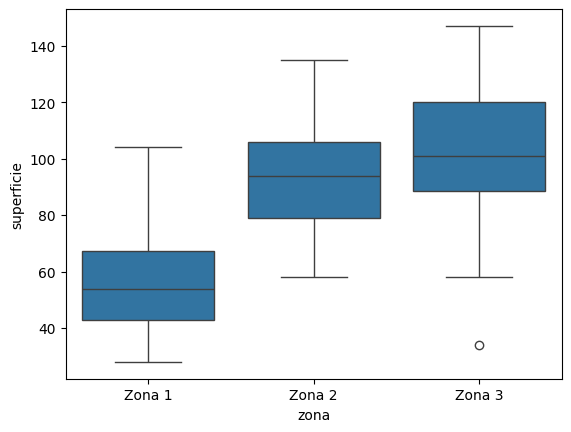

In [89]:
sns.boxplot(data=datos_outliers,x="zona",y="superficie",order=sorted(datos_outliers["zona"].unique()))

Vemos que hay al menos un outlier en la zona 3

In [91]:
datos_zona3_outliers = datos_outliers[datos_outliers["zona"]=="Zona 3"]

In [92]:
modelo_zona3_outliers=linear_model.LinearRegression()
modelo_zona3_outliers.fit(datos_zona3_outliers[["superficie"]],datos_zona3_outliers[["precio"]])
beta_1_zona3=modelo_zona3_outliers.coef_.item()
beta_0_zona3=modelo_zona3_outliers.intercept_.item()
print(beta_1,beta_0)
precio_zona3_outliers_pred=modelo_zona3_outliers.predict(datos_zona3_outliers[["superficie"]])
print(r2_score(datos_zona3_outliers["precio"],precio_zona3_outliers_pred))
print(mean_squared_error(datos_zona3_outliers["precio"],precio_zona3_outliers_pred))

4.73579682230239 -45.73153403092567
0.9445652745220188
748.8800907160429


Cambio muy poco el resultado, esto nos indica que algunos outliers en nuestro dataset, no afectarán al resultado de la regresión lineal

## Ejercicio 3

In [95]:
btc = pd.read_csv('bitcoin.csv')
btc.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [96]:
btc['Date'] = pd.to_datetime(btc['Date'], format = '%Y-%m-%d')

In [97]:
btc_2021 = btc[(btc['Date']>"2021-01-01")&(btc['Date']<"2021-07-01")]

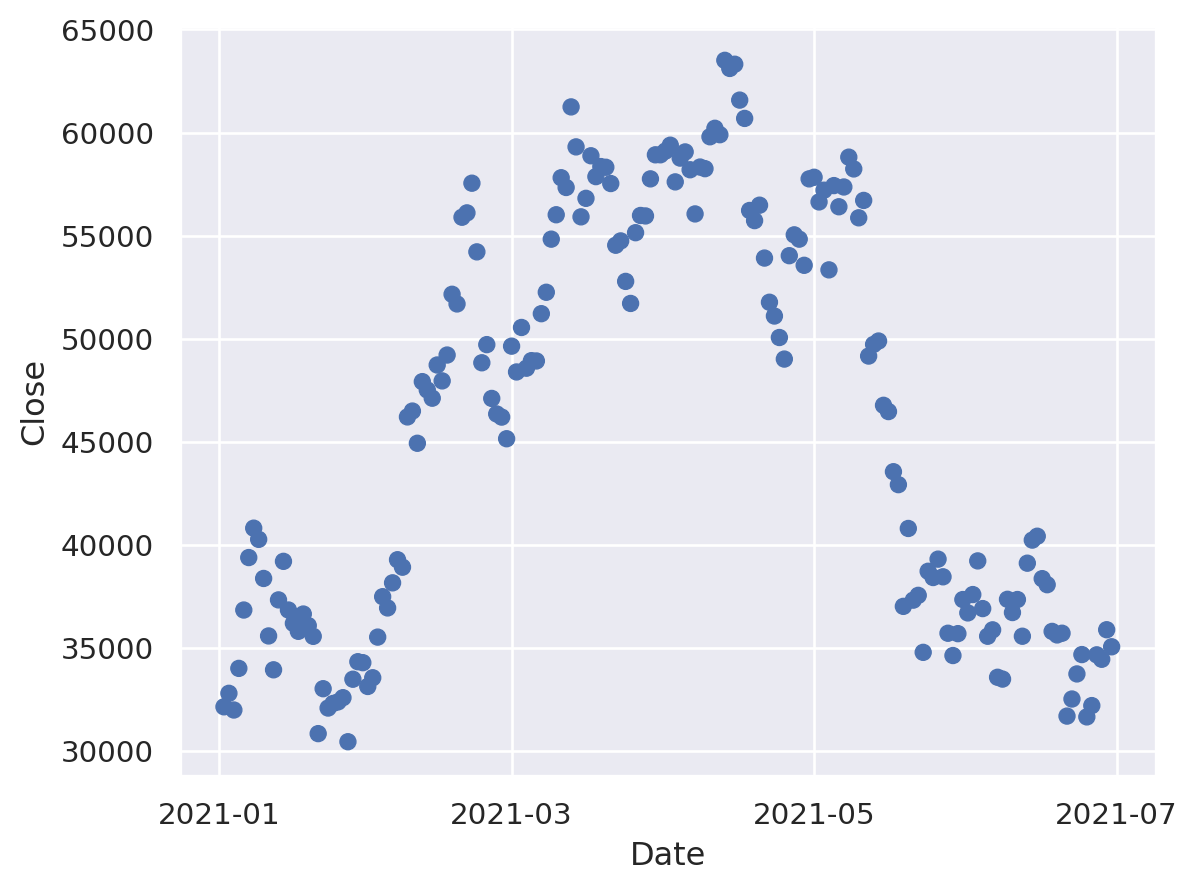

In [99]:
(
    so.Plot(data=btc_2021,x="Date",y="Close")
    .add(so.Dot())
)

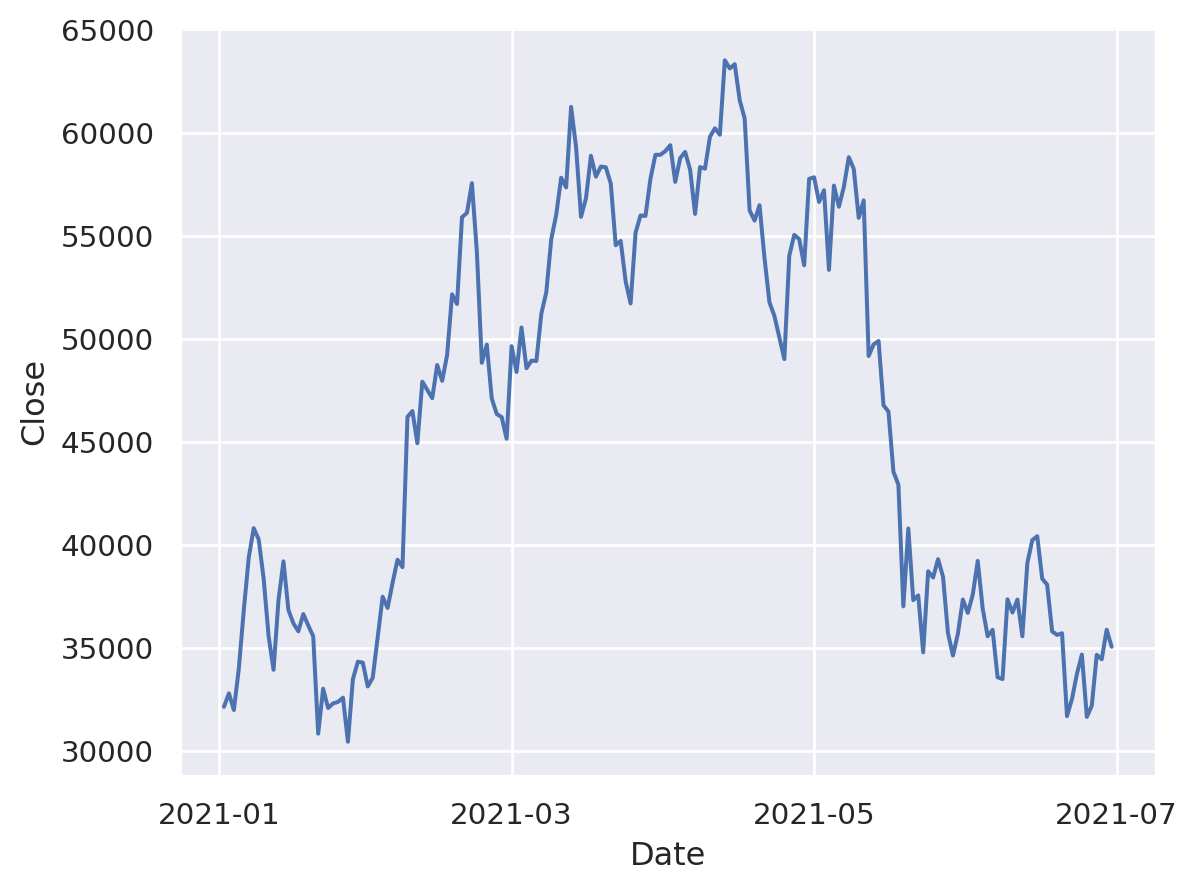

In [100]:
(
    so.Plot(data=btc_2021,x="Date",y="Close")
    .add(so.Line())
)

Ok, parecería que es mucho mejor ver la subida y bajada de precios con lineas que con puntos. De la misma manera, sospecho que va a ser muy díficil querer describir estos datos con un modelo de regresión lineal

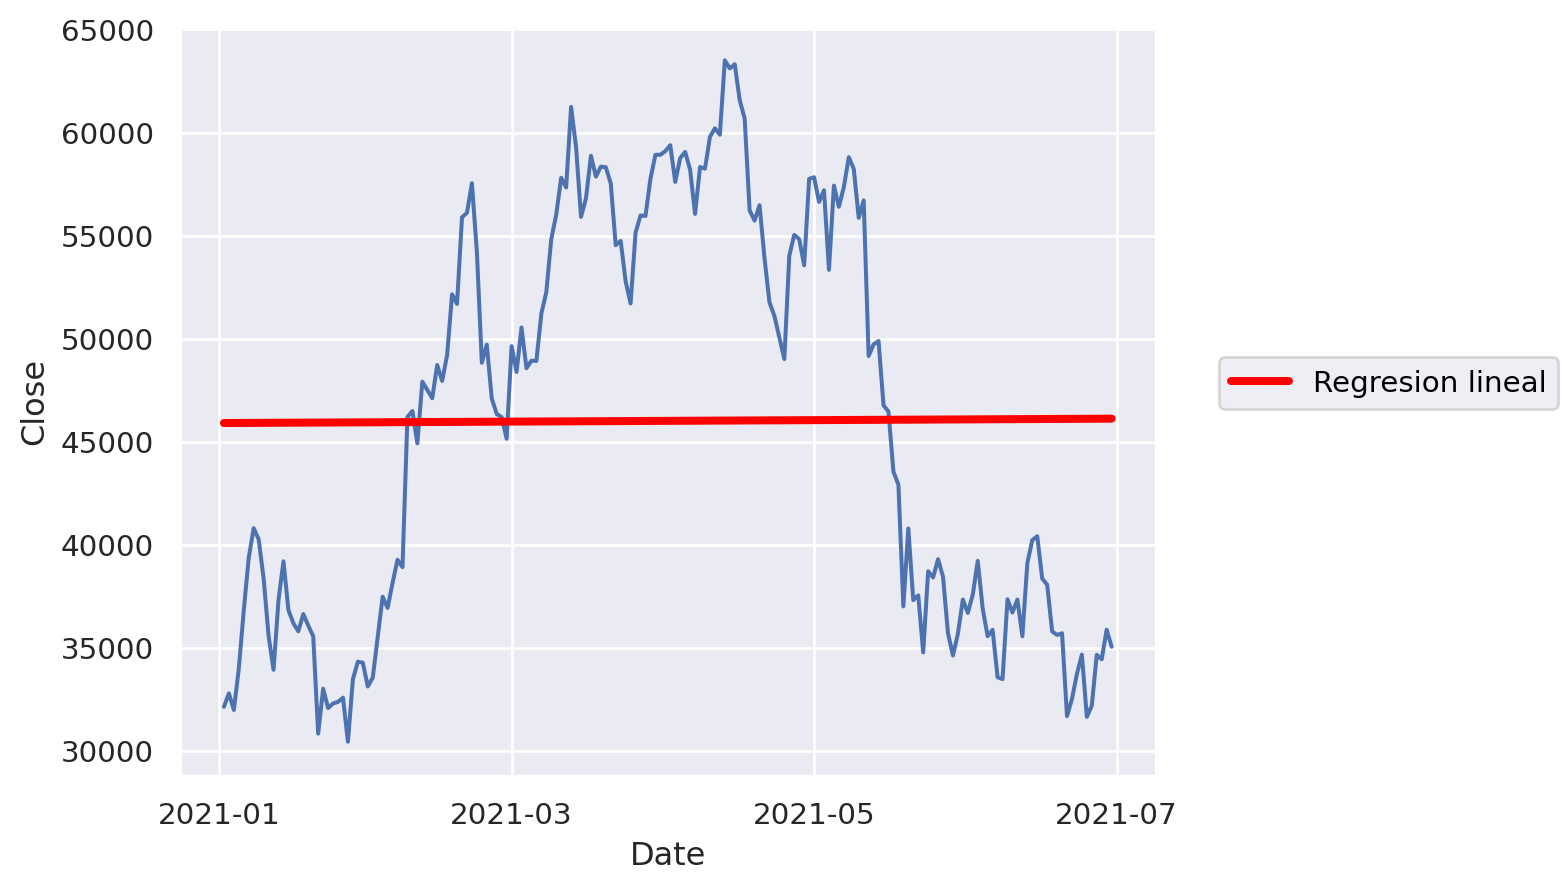

In [101]:
(
    so.Plot(data=btc_2021,x="Date",y="Close")
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
)

Con este gráfico, confirmamos que no solo la regresión lineal es un mal modelo para estimar o predecir el valor del bitcoin en este periodo, si no que es pésimo, no le pega casi a nada, veamos que dice el $R^2$ y el ECM sobre esto, por curiosidad

In [105]:
modelo_bc = linear_model.LinearRegression()
modelo_bc.fit(btc_2021[["Date"]],btc_2021[["Close"]])
close_pred=modelo_bc.predict(btc_2021[["Date"]])
print(r2_score(btc_2021["Close"],close_pred))
print(mean_squared_error(btc_2021["Close"],close_pred))

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

Me tira error el modelo, aparentemente porque no puede interpretar la fecha como variable numérica, lo cual parecería confirmar aun mas lo mala idea que sería usar un modelo de regresión para este dataset